In [1]:
# author: david dov
# date: 21/11/21

# Read xml annotation file with Leica Imagescope format and get x,y coordinates of an image regionm

## imports

In [2]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt
import imageio

## Parameters

In [3]:
slide_name = '2622'
region_idx = 1
slide_dir = "../../ScansNoROI/"

## Read xml as dict

In [4]:
with open(slide_dir + slide_name + ".xml") as fd:
    slide_xml = xmltodict.parse(fd.read())

## Display dict structure

In [5]:
slide_xml.keys()

odict_keys(['Annotations'])

In [6]:
slide_xml['Annotations'].keys()

odict_keys(['@MicronsPerPixel', 'Annotation'])

In [7]:
slide_xml['Annotations']['Annotation'].keys()

odict_keys(['@Id', '@Incremental', '@LineColor', '@LineColorReadOnly', '@MacroName', '@MarkupImagePath', '@Name', '@NameReadOnly', '@ReadOnly', '@Selected', '@Type', '@Visible', 'Attributes', 'Regions', 'Plots'])

In [8]:
slide_xml['Annotations']['Annotation']['Regions'].keys()

odict_keys(['RegionAttributeHeaders', 'Region'])

In [9]:
display(type(slide_xml['Annotations']['Annotation']['Regions']['Region']))
print('The length of the list is {}'.format(len(slide_xml['Annotations']['Annotation']['Regions']['Region'])))

list

The length of the list is 100


In [10]:
slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx].keys()

odict_keys(['@Analyze', '@Area', '@AreaMicrons', '@DisplayId', '@Id', '@ImageFocus', '@ImageLocation', '@InputRegionId', '@Length', '@LengthMicrons', '@NegativeROA', '@Selected', '@Text', '@Type', '@Zoom', 'Attributes', 'Vertices'])

In [11]:
slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx]['Vertices'].keys()

odict_keys(['Vertices'])

In [12]:
display(type(slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx]['Vertices']['Vertices']))
print('The length of the list is {}'.format(len(slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx]['Vertices']['Vertices'])))

list

The length of the list is 4


## Get x,y coordinats of the corners of an ROI

In [13]:
x = []; y = []
for i in range(4):
    x.append(int(float(slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx]['Vertices']['Vertices'][i]['@X'])))
    y.append(int(float(slide_xml['Annotations']['Annotation']['Regions']['Region'][region_idx]['Vertices']['Vertices'][i]['@Y'])))
    print("x,y: {xx},{yy}".format(xx=x[-1], yy=y[-1]))

x,y: 117632,45184
x,y: 118144,45184
x,y: 118144,45696
x,y: 117632,45696


## Convert x,y coordinates of an ROI to [x,y,h,w] format

In [14]:
width = max(x) - min(x)
height = max(y) - min(y)
roi_center_x = (max(x) + min(x))//2
roi_center_y = (max(y) + min(y))//2

## Read image with pyvips

### Bird's-eye view of the slide 

image shape:  (441, 1024, 3)


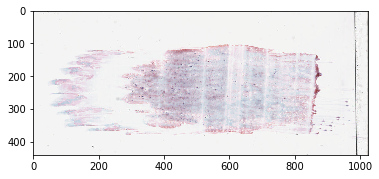

In [15]:
import pyvips

img_vips = pyvips.Image.new_from_file(slide_dir + slide_name + ".svs", page=1, access='sequential')
img = np.ndarray(buffer=img_vips.write_to_memory(),
                   dtype=np.uint8,
                   shape=[img_vips.height, img_vips.width, img_vips.bands])

print("image shape: ", img.shape)
plt.imshow(img)

### Read ROI

patch shape:  (512, 512, 3)


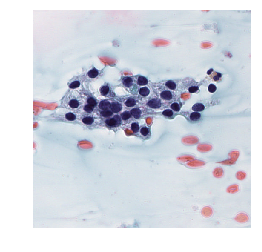

In [16]:
def get_patch(slide_dir, slide_name, roi_center_x, roi_center_y, width, height):
    img_vips = pyvips.Image.new_from_file(slide_dir + slide_name + ".svs", page=13, access='sequential')
    patch_vips = img_vips.extract_area(roi_center_x - width//2, roi_center_y - height//2, width, height)

    patch = np.ndarray(buffer=patch_vips.write_to_memory(),
                       dtype=np.uint8,
                       shape=[patch_vips.height, patch_vips.width, patch_vips.bands])

    return patch

patch = get_patch(slide_dir, slide_name, roi_center_x, roi_center_y, width, height)
print("patch shape: ", patch.shape)
_ = plt.imshow(patch)
_ = plt.axis('off')

### Read a snapshot of the same ROI from ImageScope

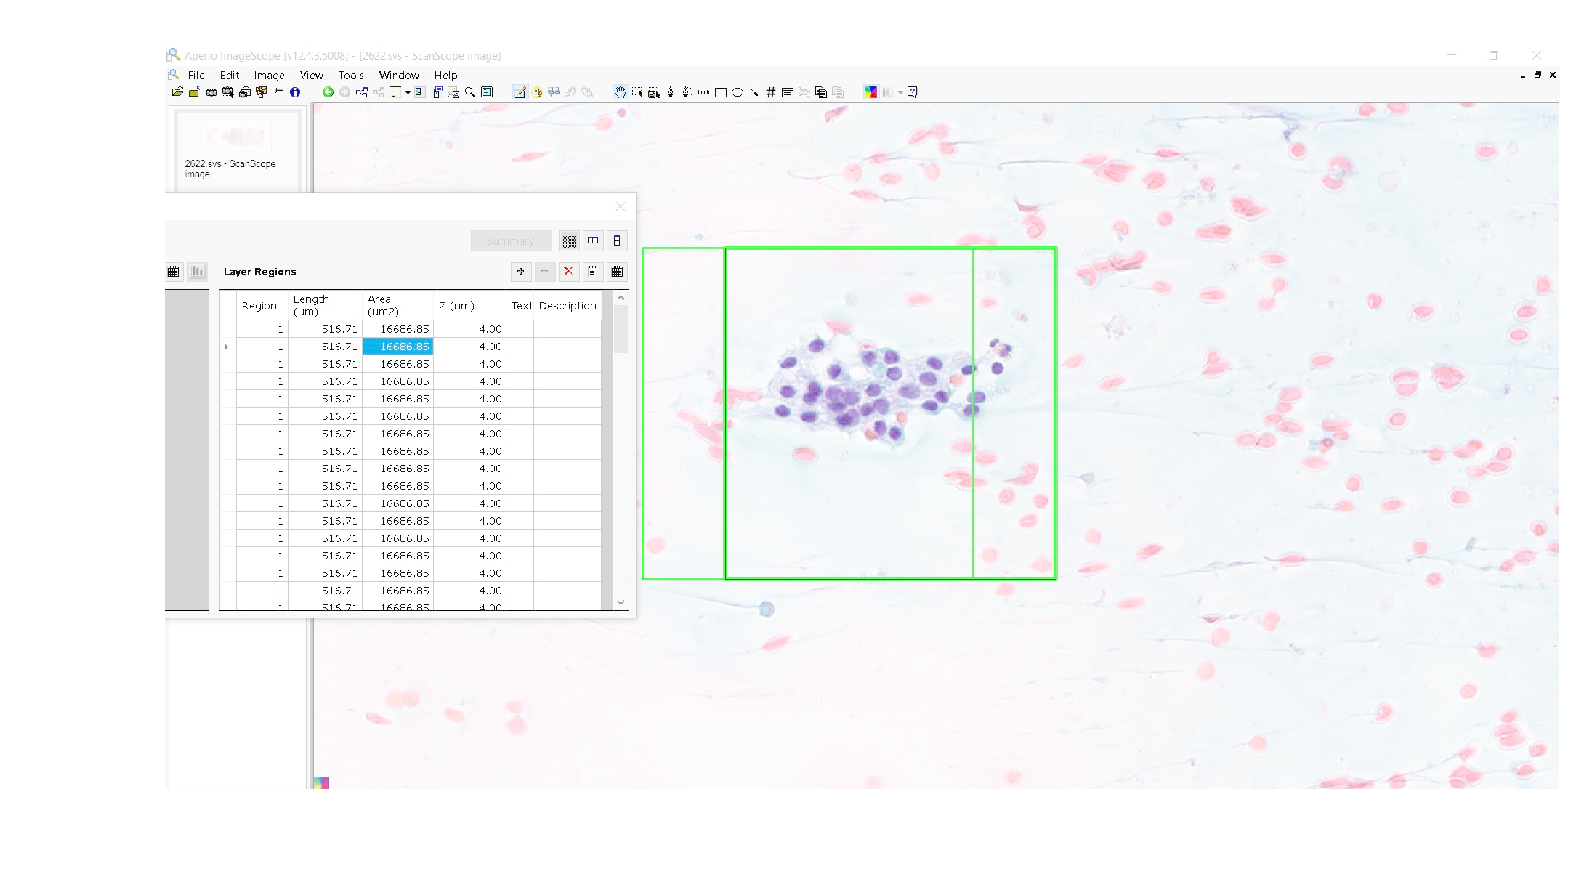

In [17]:
img = imageio.imread('roi_ImageScope.png')
plt.figure(dpi=300)
plt.imshow(img)
_ = plt.axis('off')